<a href="https://colab.research.google.com/github/pavan-kalam/PDS-Project/blob/main/deepfake_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install opendatasets

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import io
import os
import matplotlib.pyplot as plt
import opendatasets as od
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow.keras.models import Sequential

In [3]:
def download_dataset():
    if not os.path.exists('/content/drive/MyDrive/deepfake-and-real-images'):
        print("Downloading dataset...")
        od.download("https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")
        print("Dataset downloaded successfully!")
    else:
        print("Dataset already exists!")

In [4]:
def load_dataset(path):
    return tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='binary',
        color_mode="rgb",
        batch_size=32,
        image_size=(128, 128),
        shuffle=True,
        seed=123,
    )

In [5]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", padding='same', input_shape=(128, 128, 3)),
        layers.Conv2D(32, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.Conv2D(64, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.Conv2D(128, (3,3), activation="relu", padding='same'),
        layers.MaxPooling2D((2,2), strides=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    return model

In [6]:
def train_model(model, train_data, val_data, epochs=20):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=val_data,
        callbacks=[early_stopping_cb]
    )

    return history

In [7]:
def preprocess_image(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize((128, 128))
    image_array = np.array(image)
    image_array = image_array.astype('float32') / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

In [9]:
# Download the dataset
print("Checking for dataset...")
download_dataset()

# Create the model
model = create_model()

Checking for dataset...
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavankalam
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images


100%|██████████| 1.68G/1.68G [00:59<00:00, 30.3MB/s]



Dataset downloaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Load and preprocess the dataset
dataset_path = 'deepfake-and-real-images/Dataset'
train_data = load_dataset(os.path.join(dataset_path, 'Train'))
val_data = load_dataset(os.path.join(dataset_path, 'Validation'))

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [12]:
# Create directory for models if it doesn't exist
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/model', exist_ok=True)
os.makedirs('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization', exist_ok=True)

In [13]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization/model-accuracy-loss.png')
    plt.show()

Training new model...
Epoch 1/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 212s 46ms/step - accuracy: 0.7521 - loss: 0.5728 - val_accuracy: 0.8937 - val_loss: 0.2621
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 265s 49ms/step - accuracy: 0.9238 - loss: 0.1903 - val_accuracy: 0.9236 - val_loss: 0.1933
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 261s 48ms/step - accuracy: 0.9410 - loss: 0.1499 - val_accuracy: 0.9255 - val_loss: 0.2066
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 197s 45ms/step - accuracy: 0.9494 - loss: 0.1282 - val_accuracy: 0.9425 - val_loss: 0.1598
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 203s 45ms/step - accuracy: 0.9578 - loss: 0.1105 - val_accuracy: 0.9363 - val_loss: 0.1630
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 200s 46ms/step - accuracy: 0.9593 - loss: 0.1049 - val_accuracy: 0.9368 - val_loss: 0.1565
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 218s 49ms/step - accuracy: 0.9636 - loss: 0.0953 - val_accuracy: 0.9454 - val_loss: 0.1561
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 258s 

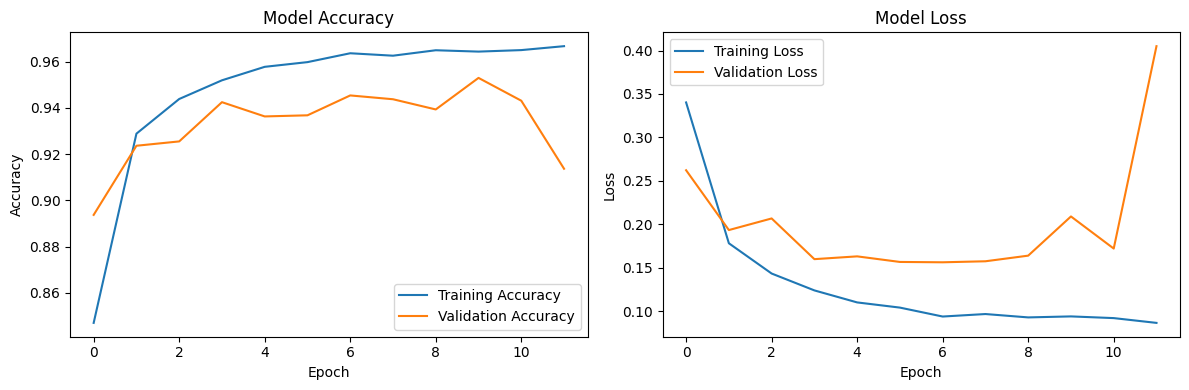

Model trained and saved.


In [14]:
# Train the model
print("Training new model...")
history = train_model(model, train_data, val_data)

# Plot and save training history
plot_history(history)

# Save the trained model
model.save('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/model/cnn_original.keras')
print("Model trained and saved.")

Found 10905 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━

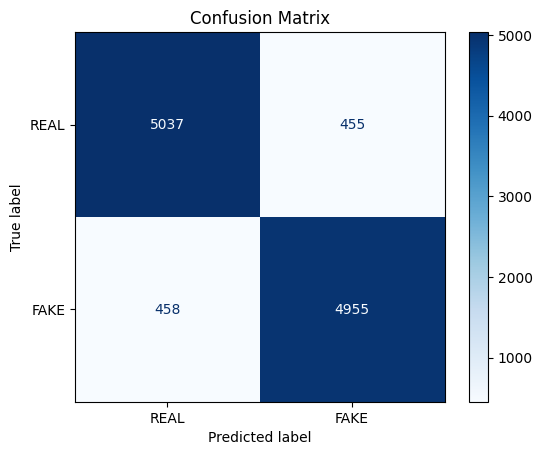

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model, test_data):
    # Get true labels and predictions
    true_labels = []
    predictions = []

    for images, labels in test_data:
        preds = model.predict(images)
        preds = (preds >= 0.5).astype(int)  # Convert probabilities to binary predictions
        true_labels.extend(labels.numpy())
        predictions.extend(preds.flatten())

    return true_labels, predictions

# Load test dataset
test_data = load_dataset(os.path.join(dataset_path, 'Test'))

# Evaluate the model
true_labels, predictions = evaluate_model(model, test_data)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["REAL", "FAKE"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig('/content/drive/MyDrive/PDS_deepfake_project/deepfake-cnn/visualization/confusionmatrix.png')
plt.show()

In [ ]:
# Display confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "0"])
disp1.plot(cmap=plt.cm.Blues)
plt.show()
plt.savefig('/content/drive/MyDrive/confusionmatrix-final.jpg')